<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/day71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')

In [4]:
data = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()
data.dropna(subset=['embarked'], inplace=True)

In [7]:
data['age'] = data['age'].fillna(data['age'].mean())


In [8]:
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data['embarked'] = LabelEncoder().fit_transform(data['embarked'])

In [9]:
X = data.drop('survived', axis=1)
y = data['survived']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
rfc = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [14]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7808988764044944
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.72      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



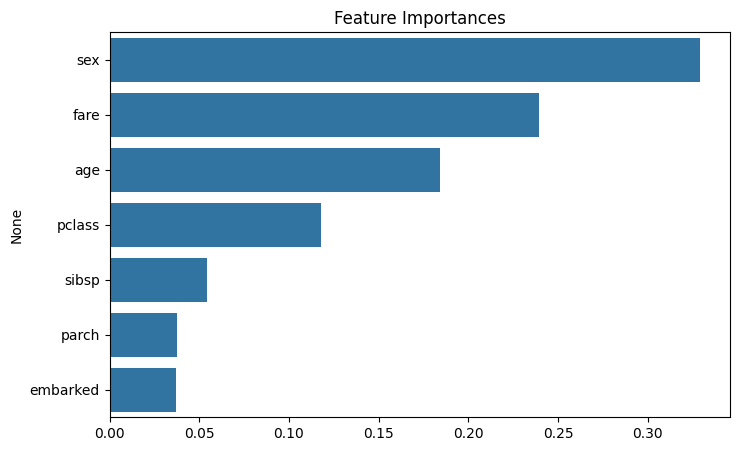

In [15]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()